In [1]:
# keep this function handy for all network visualizations in all chapters

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    import numpy as np
    import networkx as nx
    
    from IPython.display import SVG 
    from sknetwork.visualization import svg_graph 
    from sknetwork.data import Bunch 
    from sknetwork.ranking import PageRank 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

# creating a graph from an edgelist

In [2]:
import pandas as pd 
import networkx as nx 

In [3]:
data = 'https://raw.githubusercontent.com/itsgorain/datasets/main/networks/alice/edgelist_alice_original.csv' 

network_df = pd.read_csv(data) 

network_df.head() 

,source,target
0,Rabbit,Alice
1,Longitude,Alice
2,New Zealand,Ma'am
3,New Zealand,Australia
4,Fender,Alice


# creating different types of graphs

In [4]:
G = nx.from_pandas_edgelist(network_df) 
G

In [5]:
G = nx.from_pandas_edgelist(network_df, create_using=nx.DiGraph) 
G

In [6]:
G = nx.from_pandas_edgelist(network_df, create_using=nx.MultiGraph) 
G

In [7]:
G = nx.from_pandas_edgelist(network_df, create_using=nx.MultiDiGraph) 
G

# summarizing graphs

In [8]:
G = nx.from_pandas_edgelist(network_df) 

In [9]:
print(nx.info(G)) 

Graph with 68 nodes and 68 edges


# listing nodes

In [10]:
G.nodes

NodeView(('Rabbit', 'Alice', 'Longitude', 'New Zealand', "Ma'am", 'Australia', 'Fender', 'Ada', 'Mabel', 'Paris', 'Rome', 'London', 'Improve', 'Nile', 'William the Conqueror', 'Mouse', 'Lory', 'Eaglet', 'Northumbria', 'Edwin', 'Morcar', 'Stigand', 'Mercia', 'Canterbury', 'â\x80\x98it', 'William', 'Edgar Atheling', "â\x80\x98I'll", 'Said', 'Crab', 'Dinah', 'the White Rabbit', 'Bill', 'The Rabbit Sends', 'Mary Ann', 'Pat', 'Caterpillar', 'CHAPTER V.', 'William_', 'Pigeon', 'Fish-Footman', 'Duchess', 'Cheshire', 'Hare', 'Dormouse', 'Hatter', 'Time', 'Tillie', 'Elsie', 'Lacie', 'Treacle', 'Kings', 'Queens', 'Cat', 'Cheshire Cat', 'Somebody', 'Mystery', 'Seaography', 'Lobster Quadrille', 'France', 'England', 'â\x80\x98Keep', 'garden_.', 'Hm', 'Soup', 'Beautiful', 'Gryphon', 'Lizard'))

In [11]:
def show_nodes(G): 

    nodes = sorted(list(G.nodes())) 

    return ', '.join(nodes) 

In [12]:
show_nodes(G)

"Ada, Alice, Australia, Beautiful, Bill, CHAPTER V., Canterbury, Cat, Caterpillar, Cheshire, Cheshire Cat, Crab, Dinah, Dormouse, Duchess, Eaglet, Edgar Atheling, Edwin, Elsie, England, Fender, Fish-Footman, France, Gryphon, Hare, Hatter, Hm, Improve, Kings, Lacie, Lizard, Lobster Quadrille, London, Longitude, Lory, Ma'am, Mabel, Mary Ann, Mercia, Morcar, Mouse, Mystery, New Zealand, Nile, Northumbria, Paris, Pat, Pigeon, Queens, Rabbit, Rome, Said, Seaography, Somebody, Soup, Stigand, The Rabbit Sends, Tillie, Time, Treacle, William, William the Conqueror, William_, garden_., the White Rabbit, â\x80\x98I'll, â\x80\x98Keep, â\x80\x98it"

# listing edges

In [13]:
G.edges

EdgeView([('Rabbit', 'Alice'), ('Rabbit', 'Mary Ann'), ('Rabbit', 'Pat'), ('Rabbit', 'Dinah'), ('Alice', 'Longitude'), ('Alice', 'Fender'), ('Alice', 'Mabel'), ('Alice', 'William the Conqueror'), ('Alice', 'Mouse'), ('Alice', 'Lory'), ('Alice', 'Mary Ann'), ('Alice', 'Dinah'), ('Alice', 'Bill'), ('Alice', 'Caterpillar'), ('Alice', 'Pigeon'), ('Alice', 'Fish-Footman'), ('Alice', 'Duchess'), ('Alice', 'Hare'), ('Alice', 'Dormouse'), ('Alice', 'Hatter'), ('Alice', 'Kings'), ('Alice', 'Cat'), ('Alice', 'Cheshire Cat'), ('Alice', 'Somebody'), ('Alice', 'Lobster Quadrille'), ('Alice', 'â\x80\x98Keep'), ('Alice', 'garden_.'), ('Alice', 'Hm'), ('Alice', 'Soup'), ('Alice', 'the White Rabbit'), ('New Zealand', "Ma'am"), ('New Zealand', 'Australia'), ('Ada', 'Mabel'), ('Paris', 'Rome'), ('Paris', 'London'), ('Improve', 'Nile'), ('Mouse', 'â\x80\x98it'), ('Mouse', 'William'), ('Lory', 'Eaglet'), ('Lory', 'Crab'), ('Lory', 'Dinah'), ('Northumbria', 'Edwin'), ('Northumbria', 'Morcar'), ('Morcar', 'S

# removing nodes

In [14]:
G.remove_node('â\x80\x98it')

In [15]:
drop_nodes = ['Beautiful', 'CHAPTER V.', 'Hm', 'Improve', 'Longitude', 'Ma\'am', 'Mystery', 'Said',  
              'Seaography', 'Somebody', 'Soup', 'Time', 'garden_.',  'â\x80\x98I\'ll', 'â\x80\x98Keep'] 

G.remove_nodes_from(drop_nodes) 

In [16]:
show_nodes(G) 

'Ada, Alice, Australia, Bill, Canterbury, Cat, Caterpillar, Cheshire, Cheshire Cat, Crab, Dinah, Dormouse, Duchess, Eaglet, Edgar Atheling, Edwin, Elsie, England, Fender, Fish-Footman, France, Gryphon, Hare, Hatter, Kings, Lacie, Lizard, Lobster Quadrille, London, Lory, Mabel, Mary Ann, Mercia, Morcar, Mouse, New Zealand, Nile, Northumbria, Paris, Pat, Pigeon, Queens, Rabbit, Rome, Stigand, The Rabbit Sends, Tillie, Treacle, William, William the Conqueror, William_, the White Rabbit'

# quick visual inspection

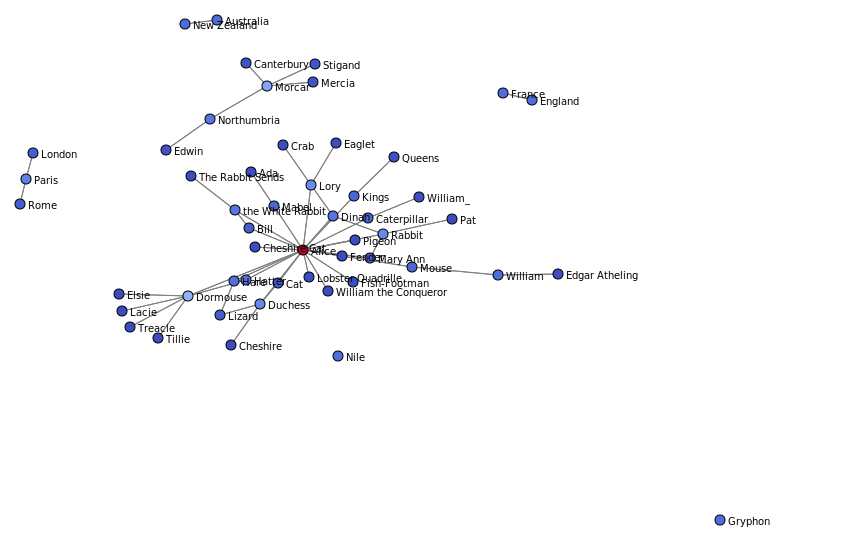

In [17]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

In [18]:
drop_nodes = ['New Zealand', 'Australia', 'France', 'England', 'London', 'Paris', 'Rome', 'Nile',  
              'William_', 'Treacle', 'Fender', 'Canterbury', 'Edwin', 'Mercia', 'Morcar',  
              'Northumbria', 'Stigand'] 

G.remove_nodes_from(drop_nodes) 

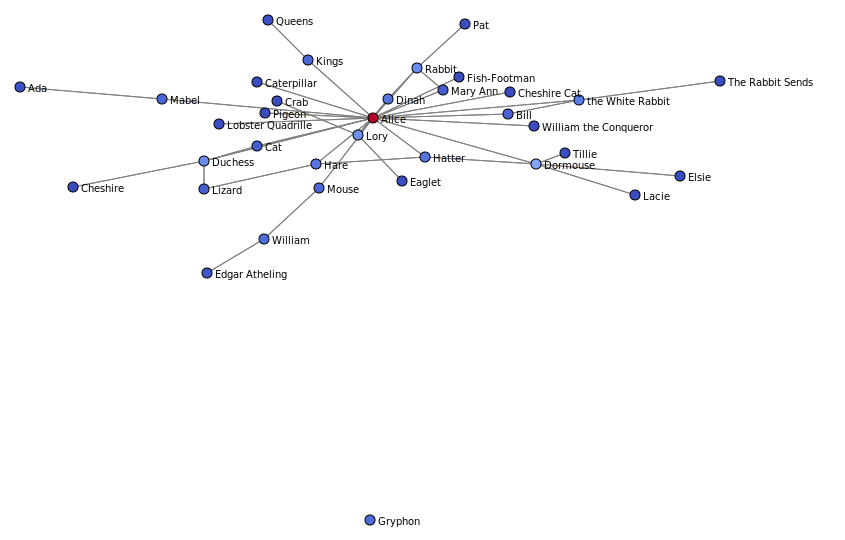

In [19]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

# search text for node mentions

In [20]:
import requests

def get_data(): 

    url = 'https://www.gutenberg.org/files/11/11-0.txt' 
    text = requests.get(url).text 

    # strip header junk 
    cutoff = text.index('Alice was beginning') 
    text = text[cutoff:] 

    # strip footer junk 
    cutoff = text.rindex('THE END') 
    text = text[:cutoff] 

    # pre-processing to clean the text 
    text = text.replace('\r', ' ').replace('\n', ' ') 
    text = text.replace('â\x80\x99', '\'').replace('â\x80\x9c', '"').replace('â\x80\x9d', '""').replace('â\x80\x94', ' ') 

    return text

In [21]:
from nltk.tokenize import sent_tokenize 

def search_text(text, search_string): 

    sentences = sent_tokenize(text) 

    for sentence in sentences: 

        if search_string in sentence.lower(): 

            print(sentence) 
            print() 

In [22]:
text = get_data()

search_text(text, 'queen')

An invitation from the  Queen to play croquet.""

The Frog-Footman repeated, in the same solemn  tone, only changing the order of the words a little, "From the Queen.

"I must go and get ready to play  croquet with the Queen,"" and she hurried out of the room.

"Do you play croquet with the  Queen to-day?""

"We  quarrelled last March just before _he_ went mad, you know "" (pointing  with his tea spoon at the March Hare,) " it was at the great concert  given by the Queen of Hearts, and I had to sing    âTwinkle, twinkle, little bat!

"Well, I'd hardly finished the first verse,"" said the Hatter, "when the  Queen jumped up and bawled out, âHe's murdering the time!

The Queen's Croquet-Ground      A large rose-tree stood near the entrance of the garden: the roses  growing on it were white, but there were three gardeners at it, busily  painting them red.

"I heard the Queen say only  yesterday you deserved to be beheaded!""

Two began in a low  voice, "Why the fact is, you see, Miss, 

# adding nodes

In [23]:
G.add_node('Queen of Hearts') 

In [24]:
add_nodes = ['Queen of Hearts', 'Frog-Footman', 'March Hare', 'Mad Hatter', 'Card Gardener #1', 'Card Gardener #2',  
             'Card Gardener #3', 'King of Hearts', 'Knave of Hearts', 'Mock Turtle'] 

G.add_nodes_from(add_nodes) 

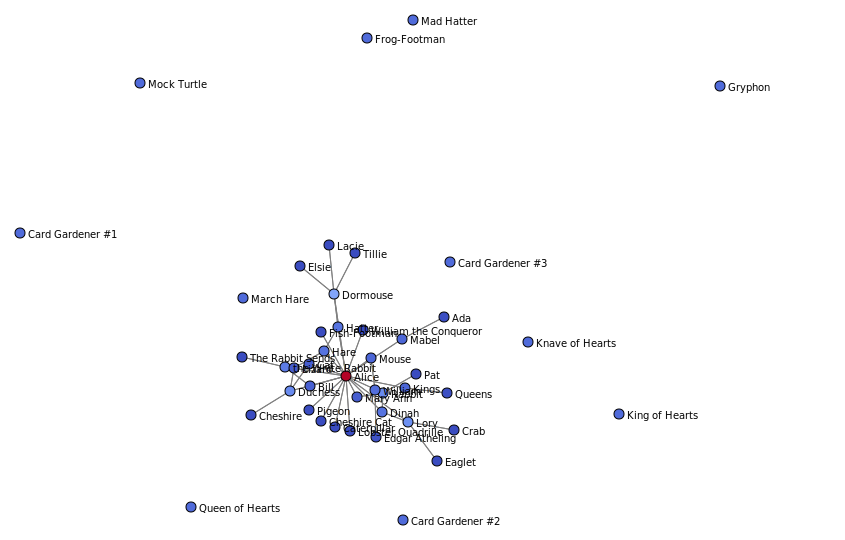

In [25]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

# adding edges

In [26]:
G.add_edge('Frog-Footman', 'Queen of Hearts') 

In [27]:
add_edges = [('Alice', 'Mock Turtle'), ('King of Hearts', 'Alice'), ('King of Hearts', 'Card Gardener #1'),  
             ('King of Hearts', 'Card Gardener #2'), ('King of Hearts', 'Card Gardener #3'),  
             ('King of Hearts', 'Dormouse'), ('King of Hearts', 'Frog-Footman'), ('King of Hearts', 'Kings'),  
             ('King of Hearts', 'Lizard'), ('King of Hearts', 'Mad Hatter'), ('King of Hearts', 'March Hare'),  
             ('King of Hearts', 'Mock Turtle'), ('King of Hearts', 'Queen of Hearts'), ('King of Hearts', 'Queens'),  
             ('King of Hearts', 'White Rabbit'), ('Knave of Hearts', 'King of Hearts'),  
             ('Knave of Hearts', 'Queen of Hearts'), 
             ('Queen of Hearts', 'Alice'), ('Queen of Hearts', 'Card Gardener #1'),  
             ('Queen of Hearts', 'Card Gardener #2'), ('Queen of Hearts', 'Card Gardener #3'),  
             ('Queen of Hearts', 'Dormouse'), ('Queen of Hearts', 'Frog-Footman'), ('Queen of Hearts', 'Kings'),  
             ('Queen of Hearts', 'Lizard'), ('Queen of Hearts', 'Mad Hatter'), ('Queen of Hearts', 'March Hare'),  
             ('Queen of Hearts', 'Mock Turtle'), ('Queen of Hearts', 'Queens'), ('Queen of Hearts', 'White Rabbit')] 

G.add_edges_from(add_edges) 

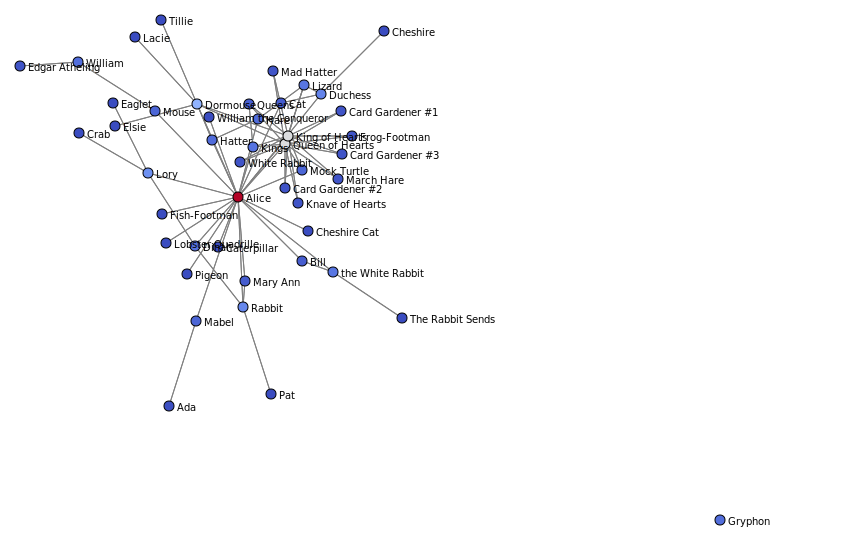

In [28]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

In [29]:
search_text(text, 'gryphon') 

They very soon came upon a Gryphon, lying fast asleep in the sun.

(If  you don't know what a Gryphon is, look at the picture.)

I must go back and see after some  executions I have ordered;"" and she walked off, leaving Alice alone  with the Gryphon.

The Gryphon sat up and rubbed its eyes: then it watched the Queen till  she was out of sight: then it chuckled.

said the Gryphon,  half to itself, half to Alice.

"Why, _she_,"" said the Gryphon.

she asked the Gryphon, and the  Gryphon answered, very nearly in the same words as before, "It's all  his fancy, that: he hasn't got no sorrow, you know.

"This here young lady,"" said the Gryphon, "she wants for to know your  history, she do.""

from the Gryphon, and the constant  heavy sobbing of the Mock Turtle.

"You ought to be ashamed of yourself for asking such a simple  question,"" added the Gryphon; and then they both sat silent and looked  at poor Alice, who felt ready to sink into the earth.

At last the  Gryphon said to the Mock Tu

In [30]:
add_edges = [('Gryphon', 'Alice'), ('Gryphon', 'Queen of Hearts'), ('Gryphon', 'Mock Turtle')] 

G.add_edges_from(add_edges) 

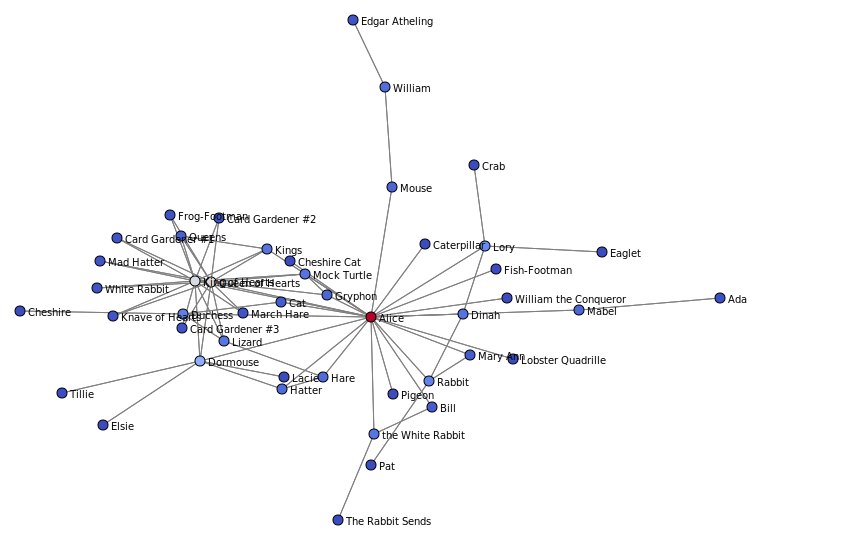

In [31]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

# renaming nodes

In [32]:
relabel_mapping = {'Cheshire':'Cheshire Cat', 'Hatter':'Mad Hatter', 'Rabbit':'White Rabbit',  
                   'William':'Father William', 'the White Rabbit':'White Rabbit', 'The Rabbit Sends':'White Rabbit',  
                   'Bill':'Lizard Bill', 'Lizard':'Lizard Bill', 'Cat':'Cheshire Cat', 'Hare':'March Hare'} 

G = nx.relabel_nodes(G, relabel_mapping) 

In [33]:
show_nodes(G) 

'Ada, Alice, Card Gardener #1, Card Gardener #2, Card Gardener #3, Caterpillar, Cheshire Cat, Crab, Dinah, Dormouse, Duchess, Eaglet, Edgar Atheling, Elsie, Father William, Fish-Footman, Frog-Footman, Gryphon, King of Hearts, Kings, Knave of Hearts, Lacie, Lizard Bill, Lobster Quadrille, Lory, Mabel, Mad Hatter, March Hare, Mary Ann, Mock Turtle, Mouse, Pat, Pigeon, Queen of Hearts, Queens, Tillie, White Rabbit, William the Conqueror'

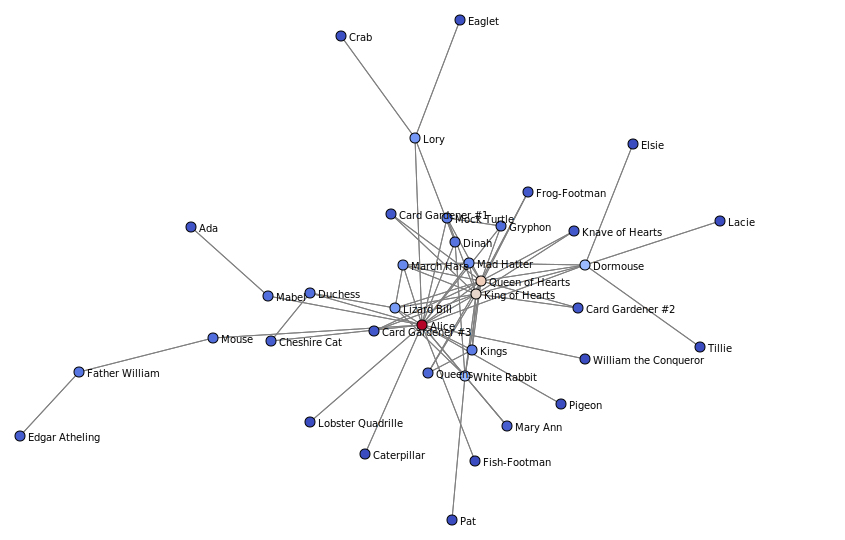

In [34]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

# removing edges

In [35]:
G.remove_edge('Dormouse', 'Tillie') 

In [36]:
drop_edges = [('Dormouse', 'Tillie'), ('Dormouse', 'Elsie'), ('Dormouse', 'Lacie')] 

G.remove_edges_from(drop_edges) 

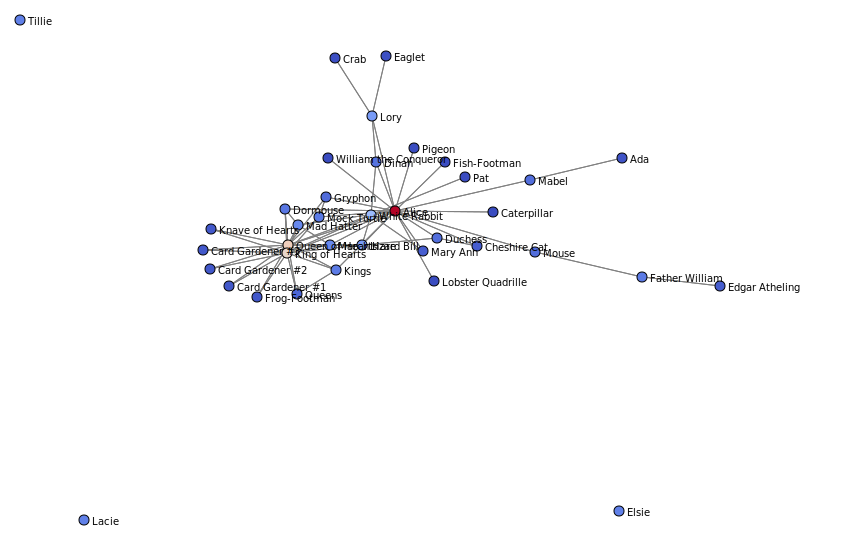

In [37]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

In [38]:
add_edges = [('Dormouse', 'Elsie'), ('Dormouse', 'Lacie'), ('Dormouse', 'Tillie')] 

In [39]:
add_edges = [('Dormouse', 'Elsie'), ('Dormouse', 'Lacie'), ('Dormouse', 'Tillie')] 

G.add_edges_from(add_edges) 

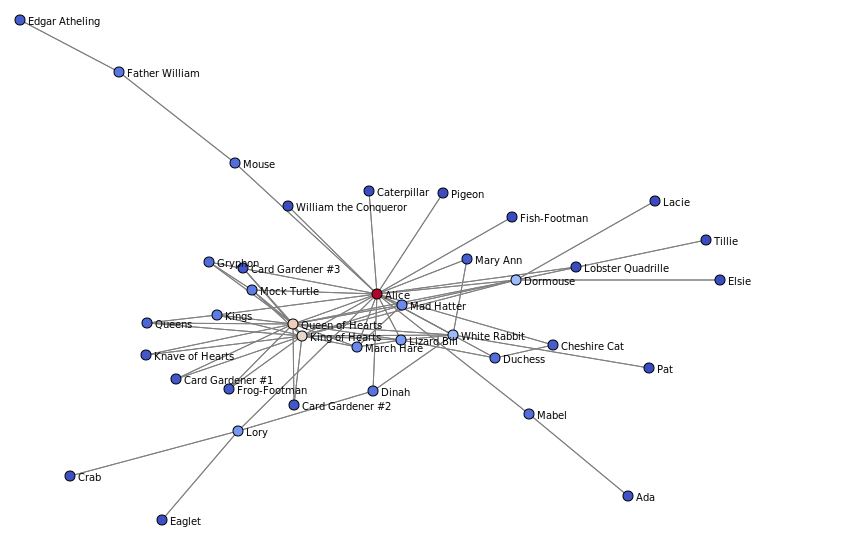

In [40]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

In [41]:
# attack simulation

In [42]:
drop_nodes = ['Alice', 'Dormouse', 'White Rabbit', 'Mad Hatter'] 

G.remove_nodes_from(drop_nodes) 

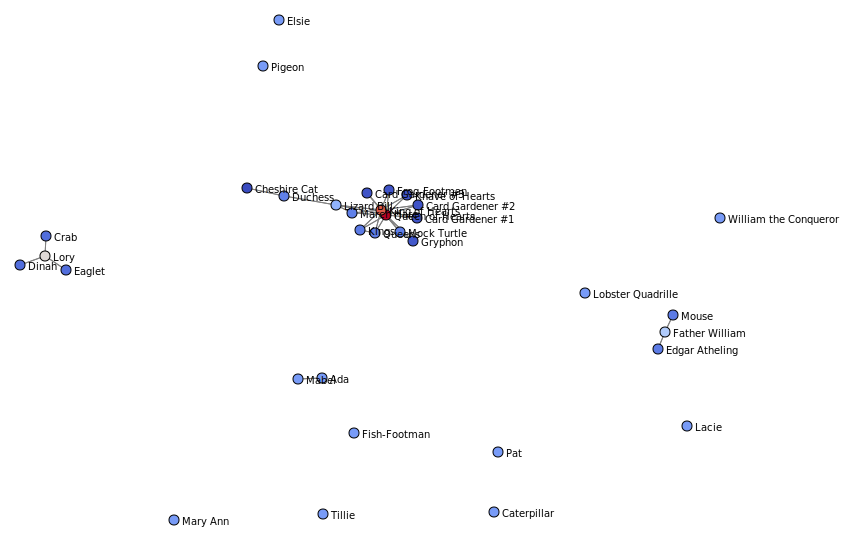

In [43]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

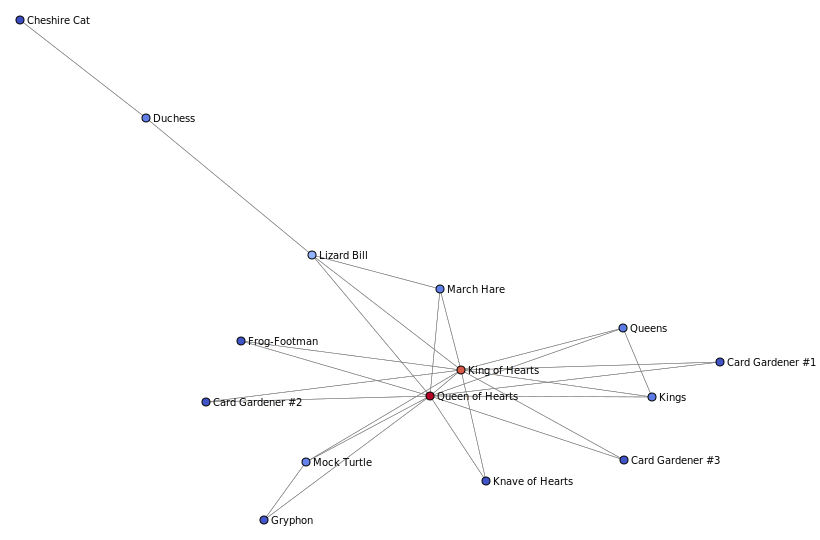

In [44]:
components = list(nx.connected_components(G)) 

main_component = components[4] 

G_sub = G.subgraph(main_component) 

draw_graph(G_sub, show_names=True, node_size=4, edge_width=0.5) 